In [12]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(6,4))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Part 1 -  Exploratory Data Analysis

In [13]:
# load json data
json_file = 'logins.json'
df= pd.read_json(json_file)

In [14]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [15]:

df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


# Part I 

Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [19]:
type(df['login_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
#using a timedelta of 15 min, count how many logins fall in that time period. create new series of counts versus periods.
rng = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
ts = pd.Series(np.zeros(len(rng)), index=rng)

In [22]:
ts.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [24]:
df = df.sort_values('login_time') # the login times were not in order, so this gets them aright.
df = df.reset_index(drop=True)
df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [25]:
p = 0 
for i in range(len(df)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    t = df['login_time'][i]
    if s < t < e:
        ts[p] = ts[p] + 1
    else:
        while (e < t): #increment to the next time 
            p = p + 1 
            s = ts.index[p] #change start time
            e = ts.index[p+1] # change end time
        ts[p] = ts[p] + 1

In [26]:
ts.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

In [27]:

ts.tail()

1970-04-13 18:00:00    5.0
1970-04-13 18:15:00    2.0
1970-04-13 18:30:00    7.0
1970-04-13 18:45:00    6.0
1970-04-13 19:00:00    0.0
Freq: 15T, dtype: float64

There appears to a be a regularity to the peaks and valleys (they follow a weekly basis as there are 4 crecendos each month)

<AxesSubplot:>

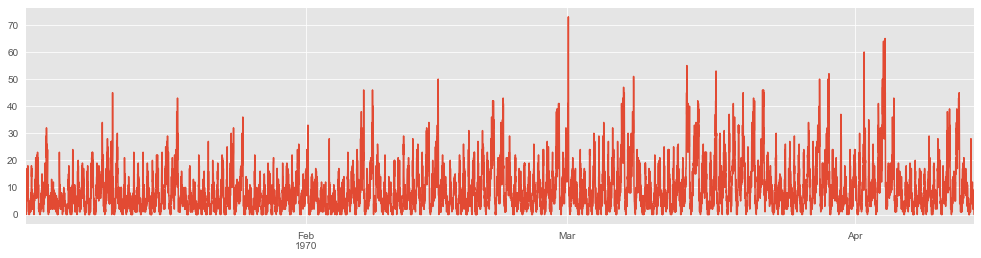

In [28]:
plt.figure(figsize=(17,4)) # The entire data set
ts.plot()

Looking at only the first week we can further see that the small undulations correspond to approximately 12 hours (the peaks are every 12 hours).

<AxesSubplot:>

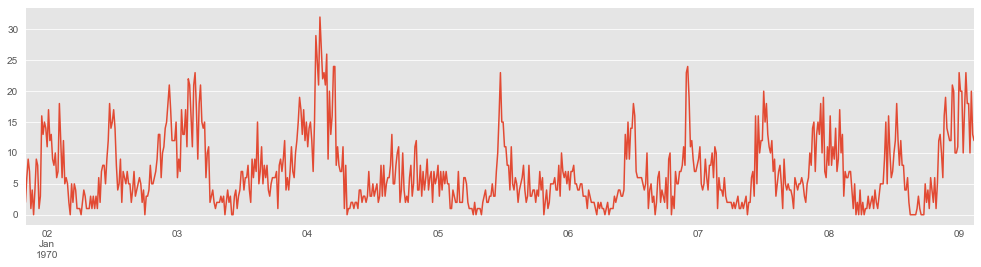

In [29]:
plt.figure(figsize=(17,4))# 1st week plot
ts[0:700].plot()

In [30]:
ts.max()

73.0

In [31]:
ts[ts == 73].index[0].dayofweek

6

The largest peak over all was a Sunday. And, for the first couple months that trend holds true (that activity peaks on the weekends and is low earlier in the week). However, the last month is much more random for peak activity - although the weekends are still consistently busy.

In [32]:
len(ts)/96/7

14.566964285714286

In [33]:
for i in range(14):
    print(ts[ts == ts[i*96*7:(i+1)*96*7].max()].index[0].dayofweek)

6
6
6
6
6
5
6
6
6
6
4
5
2
5



Conclusion
The data suggests two major trends. The first is that activity generally peaks approximately every 12 hours (early morning and early afternoon). Second, activity generally builds over the course of the week, peaking on the weekend. Although this trend weakens in March, weekends can still be counted on to be busy (other days saw increased activity as well).

The biggest data quality issue was that the login times were randomly organized, but that has been sorted